<a href="https://colab.research.google.com/github/quincynjoroge/Crime-Analysis-/blob/Transformer_model/Transformer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Hugging Face

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ktrain

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [7]:
import ktrain
from ktrain import text
import pandas as pd

In [8]:
# read data
crime = pd.read_csv('/content/drive/MyDrive/GROUP 2/CSVfiles2/crimetokenized.csv')

In [9]:
# craeting a dataframe with the tweet and target column
crime_df= crime[['tweet','label']]
crime_df.head()

,tweet,label
0,matharesjustice wanjirunjira uhaiwetu gacheke2...,police brutality
1,it is not easy being a young person in this co...,police brutality
2,you come to voters begging for votes yet none ...,police brutality
3,it would be wise if we have bloggers with cont...,police brutality
4,before you vote ask your candidates what theyl...,police brutality


In [10]:
# Defining our X and Y varaibles
X = crime_df['tweet']
y= crime_df['label']
print(X.head())
print('/n')
print(y.head())

0    matharesjustice wanjirunjira uhaiwetu gacheke2...
1    it is not easy being a young person in this co...
2    you come to voters begging for votes yet none ...
3    it would be wise if we have bloggers with cont...
4    before you vote ask your candidates what theyl...
Name: tweet, dtype: object
/n
0    police brutality
1    police brutality
2    police brutality
3    police brutality
4    police brutality
Name: label, dtype: object


In [11]:
# Splitting our data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [12]:
# checking our classes
crime_df.label.unique()

array(['police brutality', 'murder', 'corruption'], dtype=object)

In [13]:
# creating a list varaiable for our classes
target = ['police brutality','murder','corruption']

In [14]:
# converting our train varaibles to numpy array
X_train= X_train.to_numpy()
y_train= y_train.to_numpy()


In [15]:
# converting our test varaibles to numpy array
X_test= X_test.to_numpy()
y_test = y_test.to_numpy()

In [16]:
# defining our model object and preprocessing our data
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names= target)
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 16
	95percentile : 22
	99percentile : 24


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:600: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 22
	99percentile : 24


Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

**Estimate a Good Learning Rate**

Learning rates between 2e-5 and 5e-5 tend to work well with transformer models based on papers from Google. However, we will run our learning-rate-finder for two epochs to estimate the LR on this particular dataset.



simulating training for different learning rates... this may take a few moments...
Epoch 1/10
335/335 [==============================] - 227s 646ms/step - loss: 1.0999 - accuracy: 0.3373
Epoch 2/10
335/335 [==============================] - 217s 647ms/step - loss: 1.0144 - accuracy: 0.5552
Epoch 3/10
335/335 [==============================] - 217s 647ms/step - loss: 0.3678 - accuracy: 0.8786
Epoch 4/10
335/335 [==============================] - 218s 648ms/step - loss: 0.3289 - accuracy: 0.8781
Epoch 5/10
335/335 [==============================] - 217s 647ms/step - loss: 0.8778 - accuracy: 0.5234
Epoch 6/10
335/335 [==============================] - 54s 157ms/step - loss: 1.1103 - accuracy: 0.3089


done.
Visually inspect loss plot and select learning rate associated with falling loss


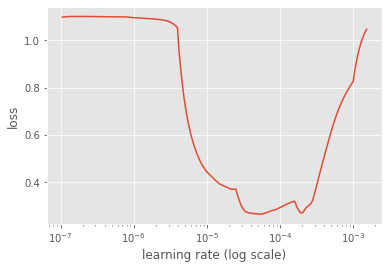

In [ ]:
#learner.lr_find(show_plot=True, max_epochs=10)

**Train Model**

Train using a 1cycle learning rate schedule.

Using 1e5 learning rate. From the graph we can see it is our most suitable learning rate

In [17]:
learner.fit_onecycle(1e-5, 10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
335/335 [==============================] - 125s 343ms/step - loss: 1.0513 - accuracy: 0.5199 - val_loss: 0.7978 - val_accuracy: 0.8455
Epoch 2/10
335/335 [==============================] - 119s 354ms/step - loss: 0.4758 - accuracy: 0.8751 - val_loss: 0.3597 - val_accuracy: 0.8657
Epoch 3/10
335/335 [==============================] - 121s 360ms/step - loss: 0.2837 - accuracy: 0.9000 - val_loss: 0.3386 - val_accuracy: 0.8727
Epoch 4/10
335/335 [==============================] - 121s 360ms/step - loss: 0.2088 - accuracy: 0.9274 - val_loss: 0.3396 - val_accuracy: 0.8717
Epoch 5/10
335/335 [==============================] - 121s 360ms/step - loss: 0.1502 - accuracy: 0.9537 - val_loss: 0.3879 - val_accuracy: 0.8717
Epoch 6/10
335/335 [==============================] - 121s 360ms/step - loss: 0.0979 - accuracy: 0.9771 - val_loss: 0.4042 - val_accuracy: 0.8707
Epoch 7/10
335/335 [==============================] - 121s 36

**Evaluate Model**

In [18]:
learner.validate(class_names=t.get_classes())

                  precision    recall  f1-score   support

      corruption       0.90      0.89      0.90       327
          murder       0.87      0.86      0.86       322
police brutality       0.86      0.88      0.87       341

        accuracy                           0.88       990
       macro avg       0.88      0.88      0.88       990
    weighted avg       0.88      0.88      0.88       990



array([[292,  16,  19],
       [ 17, 276,  29],
       [ 15,  25, 301]])

In [19]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=t)

----------
id:595 | loss:6.3 | true:police brutality | pred:corruption)



In [20]:
# understandable mistake - this  post talks about both corruption and police brutality
# from the tweet we can see the word corruption comes first sequentially
print(X_test[595])

mnadhani failed govts huanzanga aje tunahead the same direction tu rampant corruption police brutality poverty… 


- NB: model interpretability: captum

**Prediction**

In [21]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [22]:
predictor.predict('I cant believe people are dying at the hands of police brutality')

'police brutality'